# Problem 1

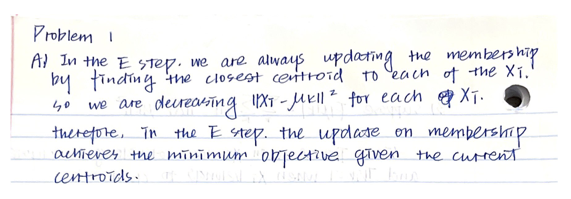

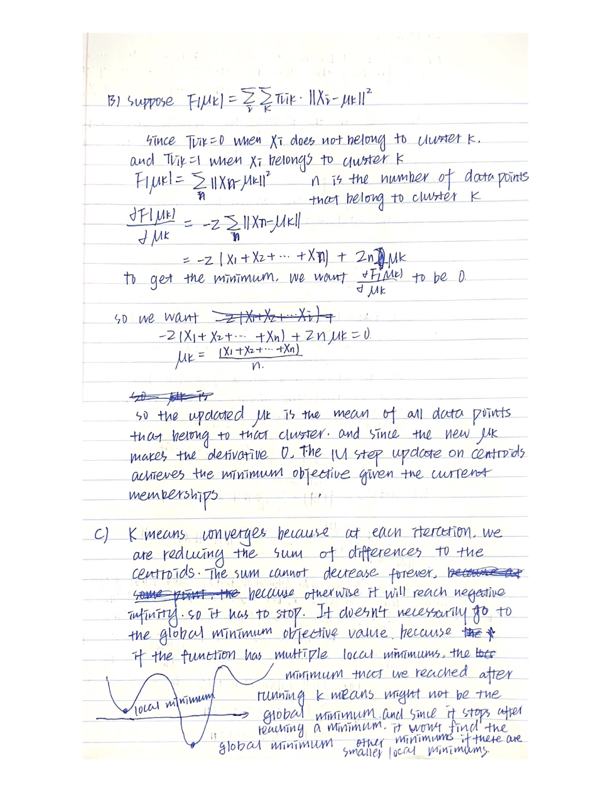

# Problem 2

## K Means

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def k_means(dataset, k):
  # make a copy of the original dataset
  copy = dataset.copy()
  # defining initial centroids by randomly selecting k points
  centroids = dataset.sample(k)

  prev_assignments = [0] * len(dataset)
  curr_assignments = [1] * len(dataset)

  iteration = 0
  
  while prev_assignments != curr_assignments:
    if iteration == 20:
      break
    iteration += 1
    prev_assignments = curr_assignments
    curr_assignments = []
    similarities = pd.DataFrame(cosine_similarity(dataset, centroids))
    # get the indices of the most similar centroid on each row
    max_idx = similarities.idxmax(axis = 1)
    clusters = []
    for idx in max_idx:
      clusters.append(idx)
    copy['cluster'] = clusters
    # update centroids
    centroids = copy.groupby('cluster').mean()
    # update current assignments
    curr_assignments = clusters
  return copy

## Purity

### Build confusion matrix

In [ ]:
def get_confusion_matrix(k, dataset):
  """
  compute confusion matrix
  row - centroids
  column - labels
  """
  result = dataset.groupby(['cluster', 'target'])['cluster'].count()
  confusion_matrix = []
  for i in range(k):
    confusion_matrix.append(result[i])
  confusion_matrix = pd.DataFrame(confusion_matrix)
  confusion_matrix = confusion_matrix.fillna(0)
  return confusion_matrix

### Purity

In [ ]:
def calc_purity(dataset, k):
  confusion_matrix = get_confusion_matrix(k, dataset)
  max_vals = confusion_matrix.max(axis = 1)
  common_labels = sum(max_vals)
  return common_labels / len(dataset)

### Gini Index

In [ ]:
def gini_index(dataset, k):
  confusion_matrix = get_confusion_matrix(k, dataset)
  row_g = []
  for i in range(len(confusion_matrix)):
    sum_squares = 0
    M_j = sum(confusion_matrix.iloc[i])
    for j in range(len(confusion_matrix.iloc[0])):
      m_ij = confusion_matrix.iloc[i, j]
      sum_squares += (m_ij / M_j) ** 2 
    row_g.append(1 - sum_squares)
  numerator = 0
  denom = 0
  for i in range(len(row_g)):
    numerator += row_g[i] * sum(confusion_matrix.iloc[i])
    denom += sum(confusion_matrix.iloc[i])

  return numerator / denom

## Fashion

### Load data

In [ ]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion = []
for i in range(len(X_train)):
  fashion.append(X_train[i].flatten())

In [ ]:
data_size = 10000
fashion = fashion[:data_size]
fashion_dataset = pd.DataFrame(fashion)

In [ ]:
fashion_dataset['target'] = Y_train[:data_size]
k = 20
fashion_dataset_copy = k_means(fashion_dataset, k)

In [ ]:
fashion_dataset_copy

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,target,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,1,0,0,0,0,...,-126,76,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,14
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,6
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,8
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
9998,0,0,0,1,0,0,0,0,24,116,...,-118,51,0,3,0,0,0,0,6,14


In [ ]:
calc_purity(fashion_dataset_copy, 20)

0.5463

In [ ]:
confusion_matrix = get_confusion_matrix(20, fashion_dataset_copy)
confusion_matrix

target,0,1,2,3,4,5,6,7,8,9
cluster,52.0,4.0,23.0,16.0,10.0,16.0,22.0,2.0,25.0,3.0
cluster,75.0,8.0,134.0,36.0,68.0,87.0,167.0,8.0,39.0,6.0
cluster,206.0,32.0,18.0,129.0,62.0,4.0,130.0,1.0,4.0,1.0
cluster,4.0,0.0,9.0,0.0,4.0,11.0,16.0,13.0,311.0,16.0
cluster,1.0,0.0,2.0,0.0,1.0,199.0,1.0,59.0,11.0,783.0
cluster,1.0,0.0,3.0,3.0,1.0,114.0,1.0,384.0,7.0,10.0
cluster,1.0,0.0,3.0,0.0,11.0,38.0,1.0,13.0,307.0,8.0
cluster,1.0,451.0,3.0,12.0,3.0,1.0,1.0,1.0,1.0,1.0
cluster,20.0,56.0,38.0,62.0,13.0,38.0,35.0,4.0,31.0,5.0
cluster,0.0,0.0,0.0,1.0,0.0,212.0,0.0,387.0,13.0,86.0


In [ ]:
gini_index(fashion_dataset_copy, 20)

0.5768594932238589

In [ ]:
k = 10
fashion_dataset_copy = k_means(fashion_dataset, k)

In [ ]:
calc_purity(fashion_dataset_copy, k)

0.4436

In [ ]:
gini_index(fashion_dataset_copy, k)

0.665627981303856

In [ ]:
fashion_dataset['target'] = Y_train[:data_size]
k = 40
fashion_dataset_copy = k_means(fashion_dataset, k)

In [ ]:
calc_purity(fashion_dataset_copy, k)

0.5815

In [ ]:
gini_index(fashion_dataset_copy, k)

0.5312981651944435

## 20 NG

### Load data

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
vectorizer = TfidfVectorizer(stop_words = "english")
newsgroups_dataset = vectorizer.fit_transform(newsgroups.data[:1000])

In [ ]:
ng_dataframe = pd.DataFrame.sparse.from_spmatrix(newsgroups_dataset)

### K Means

In [ ]:
k = 20
ng_dataframe = k_means(ng_dataframe, k)

<ipython-input-4-7a720711fe95>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy['cluster'] = clusters


In [ ]:
# from tables.utils import idx2long
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def k_means(dataset, k):
#   # dataset is a numpy matrix
#   np.random.seed()
#   idx = np.random.choice(dataset.shape[0], k, replace=False)
#   centroids = dataset[idx, :]

#   assignment_change = 1
#   assignments = [-1] * dataset.shape[0]

#   while assignment_change != 0:
#     sims = cosine_similarity(dataset, centroids)
#     for i, row in enumerate(sims):
#       idx = np.argpartition(row, -1)[0]
#       if assignments[i] != idx:
#         assignment_change += 1
#         assignments[i] = idx

#     # find new centroids
#     for i in range(k):
#       new_clusters = dataset[assignments==k]
#       centroids[i] = np.mean(new_clusters, axis = 0)

#   return assignments, centroids

In [ ]:
# k_means(newsgroups_dataset, 20)

### Purity

In [ ]:
ng_dataframe['target'] = newsgroups.target[:1000]
calc_purity(ng_dataframe, k)

<ipython-input-11-8bb77f16457f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ng_dataframe['target'] = newsgroups.target[:1000]


0.295

In [ ]:
gini_index(ng_dataframe, k)

0.8405396114207816

### k = 10

In [ ]:
k = 10
ng_dataframe = pd.DataFrame.sparse.from_spmatrix(newsgroups_dataset)
ng_dataframe = k_means(ng_dataframe, k)

<ipython-input-4-7a720711fe95>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy['cluster'] = clusters


In [ ]:
ng_dataframe['target'] = newsgroups.target[:1000]
calc_purity(ng_dataframe, k)

0.155

In [ ]:
gini_index(ng_dataframe, k)

0.9132671842069927

### k = 40

In [ ]:
k = 40
ng_dataframe = pd.DataFrame.sparse.from_spmatrix(newsgroups_dataset)
ng_dataframe = k_means(ng_dataframe, k)

<ipython-input-4-7a720711fe95>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy['cluster'] = clusters


In [ ]:
ng_dataframe['target'] = newsgroups.target[:1000]
calc_purity(ng_dataframe, k)

<ipython-input-19-8bb77f16457f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ng_dataframe['target'] = newsgroups.target[:1000]


0.341

In [ ]:
gini_index(ng_dataframe, k)

0.7978757849336535

## MNIST

### K Means

In [21]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
# define data size and k
k = 10
data_size = 10000
mnist_data = mnist.data[:data_size]

# run k means on mnist data
copy = k_means(mnist_data, k)

In [ ]:
mnist_target = mnist.target[:data_size]

In [ ]:
copy['target'] = mnist_target

In [ ]:
copy

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9


### Calculate purity

In [ ]:
cluster_label = copy.groupby(['cluster'])['target'].agg(pd.Series.mode)

In [ ]:
correct_label = 0

for i in range(len(copy)):
  target = copy.iloc[i]['target']
  cluster = copy.iloc[i]['cluster']
  if target == cluster_label[cluster]:
    correct_label += 1
purity = correct_label / len(copy)
print(purity)

0.5996


In [ ]:
get_confusion_matrix(k, copy)

target,0,1,2,3,4,5,6,7,8,9
cluster,50,4,25,11,17,29,762,0,11,3
cluster,2,3,732,31,2,5,2,6,6,0
cluster,1,1045,78,27,17,8,32,33,55,9
cluster,1,0,5,6,226,11,0,405,10,248
cluster,16,0,40,6,232,14,167,37,25,87
cluster,23,5,65,742,1,319,4,1,272,17
cluster,0,13,1,31,248,41,1,136,40,287
cluster,55,54,25,153,19,391,26,7,502,7
cluster,852,0,14,8,0,18,20,8,6,5
cluster,1,3,6,17,218,27,0,437,17,315


In [ ]:
calc_purity(copy, k)

0.5996

### Gini Index

In [ ]:
gini_index(copy, k)

0.526507834937846

### K = 20

In [ ]:
k = 20
data_size = 10000
mnist_data = mnist.data[:data_size]
mnist_target = mnist.target[:data_size]
copy = k_means(mnist_data, k)
copy['target'] = mnist_target

In [ ]:
calc_purity(copy, k)

0.6994

In [ ]:
gini_index(copy, k)

0.4124804552411375

### K = 40

In [22]:
k = 40
data_size = 10000
mnist_data = mnist.data[:data_size]
mnist_target = mnist.target[:data_size]
copy = k_means(mnist_data, k)
copy['target'] = mnist_target

In [23]:
calc_purity(copy, k)

0.801

In [24]:
gini_index(copy, k)

0.2940245102032132

# Problem 3

In [ ]:
# read in txt
!wget https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/HW2/2gaussian.txt

--2023-02-03 23:52:03--  https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/HW2/2gaussian.txt
Resolving www.ccs.neu.edu (www.ccs.neu.edu)... 52.70.229.197
Connecting to www.ccs.neu.edu (www.ccs.neu.edu)|52.70.229.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166995 (163K) [text/plain]
Saving to: ‘2gaussian.txt’

2gaussian.txt       100%[===================>] 163.08K  --.-KB/s    in 0.1s    

2023-02-03 23:52:04 (1.32 MB/s) - ‘2gaussian.txt’ saved [166995/166995]



In [ ]:
import numpy as np

data = np.loadtxt("2gaussian.txt", dtype=float)

In [ ]:
import math
from scipy.stats import multivariate_normal

def gaussian_mixture(dataset, k):
  # initialize mu
  idx = np.random.randint(dataset.shape[0], size=k)
  mu = dataset[idx,:]
  # initialize covariance matrix and gaussian functions
  first_col = [item[0] for item in dataset]
  second_col = [item[1] for item in dataset]
  cov = []
  Ns = []
  for i in range(k):
    cov_1 = np.random.choice(first_col, size=1)
    cov_2 = np.random.choice(second_col, size=1)
    cov.append(np.array([[cov_1[0], 0], [0, cov_2[0]]]))
    Ns.append(multivariate_normal(mean=mu[0], cov=cov[i]))

  n = len(dataset)
  d = len(dataset[0])
  PIs = []
  if k == 2:
    PIs.append(0.5)
    PIs.append(0.5)
  elif k == 3:
    PIs.append(0.3)
    PIs.append(0.3)
    PIs.append(0.4)

  # initialize a list to save mu changes in each iteration
  mu_changes = [10 for i in range(k)]
  epsilon = 0.00001
  # a 2d array to store the pi_iks
  pi_ik_table = np.zeros((n, k))
  while np.mean(mu_changes) > epsilon: 
    # E step
    for i in range(n):
      f_x = 0
      for j in range(k):
        Ns[j] = multivariate_normal(mean=mu[j], cov=cov[j])
        f_x += PIs[j] * Ns[j].pdf(dataset[i])
      for m in range(k):
        pi_ik = PIs[m] * Ns[m].pdf(dataset[i]) / f_x
        pi_ik_table[i][m] = pi_ik
    # M step             
    for m in range(k):
      num_sum = np.zeros(shape = (dataset.shape[1], dataset.shape[1]));
      pi_sum = 0
      mu_num_sum = np.zeros(shape = (1, dataset.shape[1]));
      for i in range(n):
        data_minus_mu = dataset[i] - mu[m]
        num_sum += pi_ik_table[i][m] * np.outer(data_minus_mu, data_minus_mu)
        pi_sum += pi_ik_table[i][m]
        mu_num_sum += dataset[i] * pi_ik_table[i][m]
      cov_updated = num_sum / pi_sum
      cov[m] = cov_updated
      mu_updated = mu_num_sum / pi_sum
      mu_changes[m] = abs(mu[m] - mu_updated)
      mu[m] = mu_updated
      pi_k_updated = pi_sum / n
      PIs[m] = pi_k_updated
  return mu, cov, PIs

In [ ]:
gaussian_mixture(data, 2)

(array([[2.99416627, 3.0520925 ],
        [7.0131662 , 3.98314441]]), [array([[1.01029117, 0.02718518],
         [0.02718518, 2.93779622]]), array([[0.97472776, 0.49745262],
         [0.49745262, 1.00112765]])], [0.33480159651090113,
  0.6651984034890996])

In [ ]:
!wget https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/HW2/3gaussian.txt

--2023-02-04 15:11:58--  https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/HW2/3gaussian.txt
Resolving www.ccs.neu.edu (www.ccs.neu.edu)... 52.70.229.197
Connecting to www.ccs.neu.edu (www.ccs.neu.edu)|52.70.229.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278321 (272K) [text/plain]
Saving to: ‘3gaussian.txt’

3gaussian.txt       100%[===================>] 271.80K   495KB/s    in 0.5s    

2023-02-04 15:12:00 (495 KB/s) - ‘3gaussian.txt’ saved [278321/278321]



In [ ]:
import numpy as np

data2 = np.loadtxt("3gaussian.txt", dtype=float)

In [ ]:
gaussian_mixture(data2, 3)

(array([[3.0397696 , 3.04870481],
        [7.02157875, 4.01547002],
        [5.01176165, 7.00150172]]), [array([[1.02856191, 0.02696745],
         [0.02696745, 3.38512927]]), array([[0.99038389, 0.50094824],
         [0.50094824, 0.99564744]]), array([[0.97967293, 0.18513245],
         [0.18513245, 0.97450474]])], [0.20561389675636474,
  0.2984343626415667,
  0.49595174060206865])

# Problem 4

## SpamBase

In [26]:
from sklearn.datasets import fetch_openml
spambase = fetch_openml('spambase')

In [27]:
spambase_data = spambase.data

In [28]:
spambase_target = spambase.target

In [29]:
train_size = int(0.6 * len(spambase_data))

spambase_train_data = spambase_data[:train_size]
spambase_train_target = spambase_target[:train_size]
spambase_test_data = spambase_data[train_size:] 
spambase_test_target = spambase_target[train_size:] 

In [30]:
from sklearn.mixture import GaussianMixture

k = 5
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(spambase.data)

GaussianMixture(covariance_type='diag', n_components=5)

In [33]:
spambase_train_target.value_counts()

1    1813
0     947
Name: class, dtype: int64

In [36]:
p1 = 1813 / (1813 + 947)
p0 = 947 / (1813 + 947)
ps = []
ps.append(p0)
ps.append(p1)

In [39]:
def train(X_train, Y_train, k, num_models):
  models = []
  labels = list(set(Y_train))
  for i in range(len(labels)):
    models.append(GaussianMixture(n_components=k, covariance_type='diag', random_state=42))
    models[i].fit(X_train[Y_train==labels[i]])
  return models, labels

In [40]:
models, labels = train(spambase_train_data.values, spambase_train_target, 10, 2)

In [41]:
from sklearn.metrics import accuracy_score

def test(X_test, Y_test, models):
  predictions = []
  n = len(X_test)
  for i in range(n):
    best_score = -1
    best_model_index = -1
    for j in range(len(models)):
      score = models[j].score(X_test.iloc[i].to_numpy().reshape(1, -1)) + ps[j]
      if score > best_score:
        best_score = score
        best_model_index = j
    predictions.append(labels[best_model_index])
  return accuracy_score(predictions, Y_test)

In [42]:
test(spambase_test_data, spambase_test_target, models)

0.6979902227050516


## Fashion

In [ ]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
fashion = []
for i in range(len(X_train)):
  fashion.append(X_train[i].flatten())
models, labels = train(np.array(fashion), Y_train, 2, 2)

In [ ]:
from sklearn.metrics import accuracy_score

def test(X_test, Y_test, models):
  predictions = []
  n = len(X_test)
  for i in range(n):
    best_score = -1
    best_model_index = -1
    for j in range(len(models)):
      score = models[j].score(X_test[i].reshape(1, -1))
      if score > best_score:
        best_score = score
        best_model_index = j
    predictions.append(labels[best_model_index])
  return accuracy_score(predictions, Y_test)

In [ ]:
fashion_test = []
for i in range(len(X_test)):
  fashion_test.append(X_test[i].flatten())
test(np.array(fashion_test), Y_test, models)

0.243